In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------- CONSTANTES -------------
RANDOM_STATE = 42 # Constante para reproducibilidade 

# Coloca a precisão de float com 2 casas para praticidade
pd.set_option("display.precision", 2)

# Lê o dataset
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [10]:

print(f"O dataset inteiro tem {df.shape[0]} registros")

O dataset inteiro tem 253680 registros


## Parte 1: Exploração e Tratamento de Dados

Checar se há valores faltantes e outliers

In [11]:
df.isnull().sum().to_frame() # Nada aqui!

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


- Acima de 40,0. Obesidade. grau III.
- Entre 35,0 e 39,9. Obesidade grau II. 
- Entre 30,0 e 34,9. Obesidade grau I.
- Entre 25,0 e 29,9. Sobrepeso.
- Entre 18,6 e 24,9. Normal.
- 18,5 ou menos. Magreza.


In [41]:
peso, imc, altura = 0, 30, 2
peso = imc * (altura ** altura)
peso



120

In [43]:
df[["BMI", "MentHlth", "PhysHlth", "Age", "Education", "Income",]].describe()

,BMI,MentHlth,PhysHlth,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,28.38,3.18,4.24,8.03,5.05,6.05
std,6.61,7.41,8.72,3.05,0.99,2.07
min,12.00,0.00,0.00,1.00,1.00,1.00
25%,24.00,0.00,0.00,6.00,4.00,5.00
50%,27.00,0.00,0.00,8.00,5.00,7.00
75%,31.00,2.00,3.00,10.00,6.00,8.00
max,98.00,30.00,30.00,13.00,6.00,8.00


Como a maioria dos campos são Booleanos, vamos plotar apenas aqueles que inteiros, para enxergar se há outliers.

Text(0.5, 0.98, 'Informações plotadas pela quantidade de observações (Histograma)')

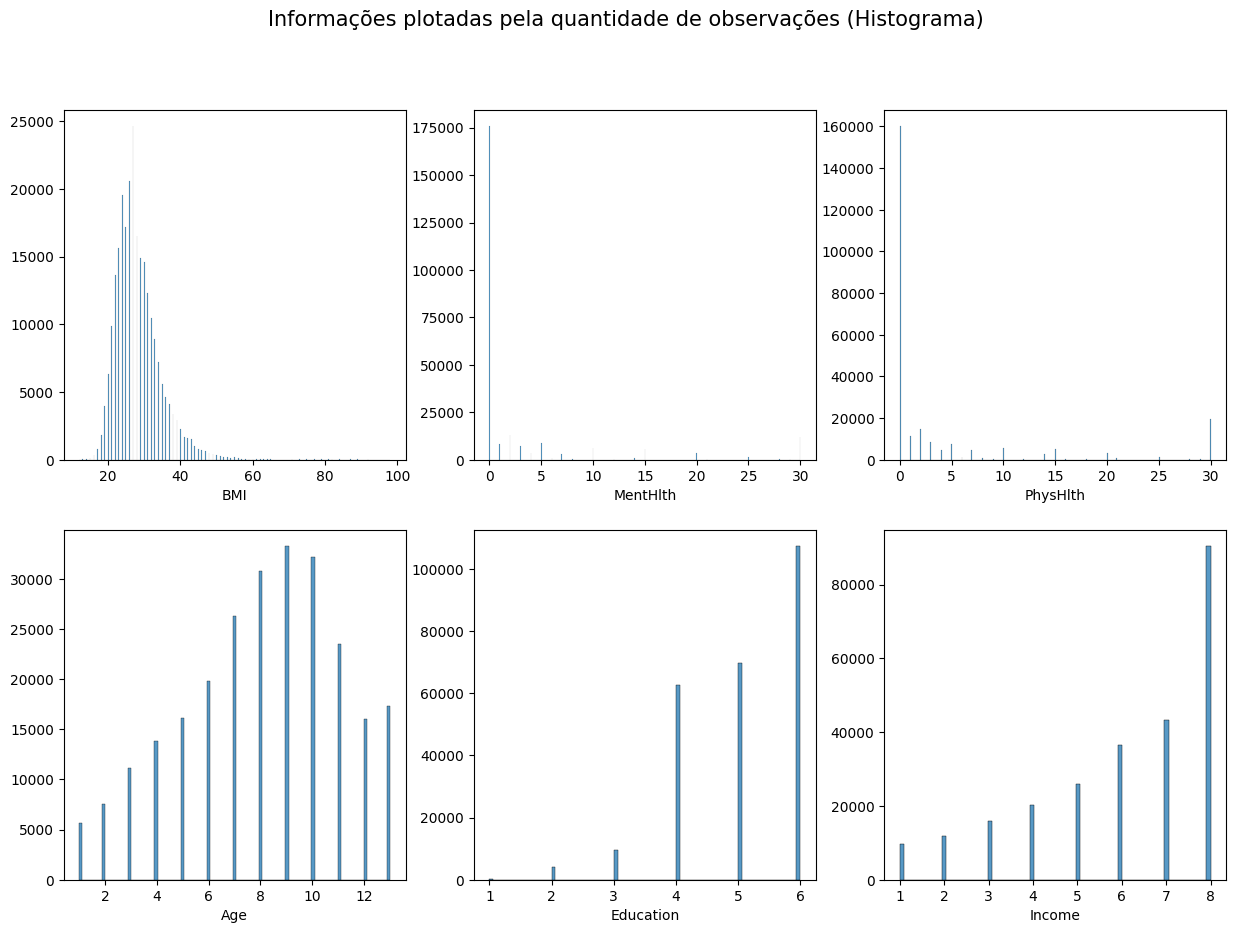

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(15, 10)

sns.histplot(df["BMI"], ax=axs[0,0]).set(ylabel=None)
sns.histplot(df["MentHlth"], ax=axs[0,1]).set(ylabel=None)
sns.histplot(df["PhysHlth"], ax=axs[0,2]).set(ylabel=None)
sns.histplot(df["Age"], ax=axs[1,0]).set(ylabel=None)
sns.histplot(df["Education"], ax=axs[1,1]).set(ylabel=None)
sns.histplot(df["Income"], ax=axs[1,2]).set(ylabel=None);

fig.suptitle("Informações plotadas pela quantidade de observações (Histograma)", fontsize=15)

<Axes: xlabel='BMI', ylabel='Count'>

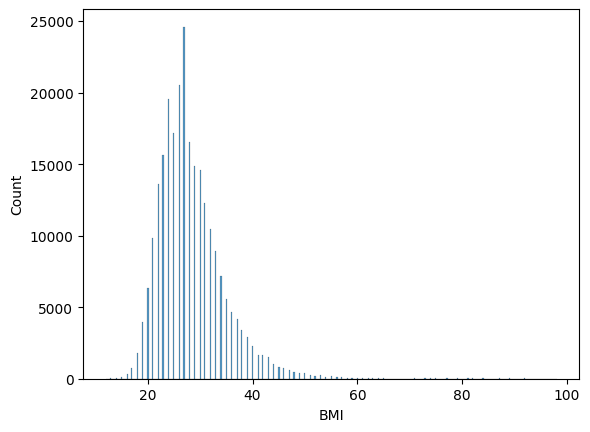

In [14]:
sns.histplot(df["BMI"])
